In [ ]:
#Loading Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve,f1_score, precision_score, recall_score
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier

In [ ]:
summary_list=[]

In [ ]:
# Loading the iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=['sepal_length', 'sepal_width', 'petal_length','petal_width', 'Species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print("shape",df.shape)
df.info()

shape (150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#check null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

In [ ]:
#statistics info
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


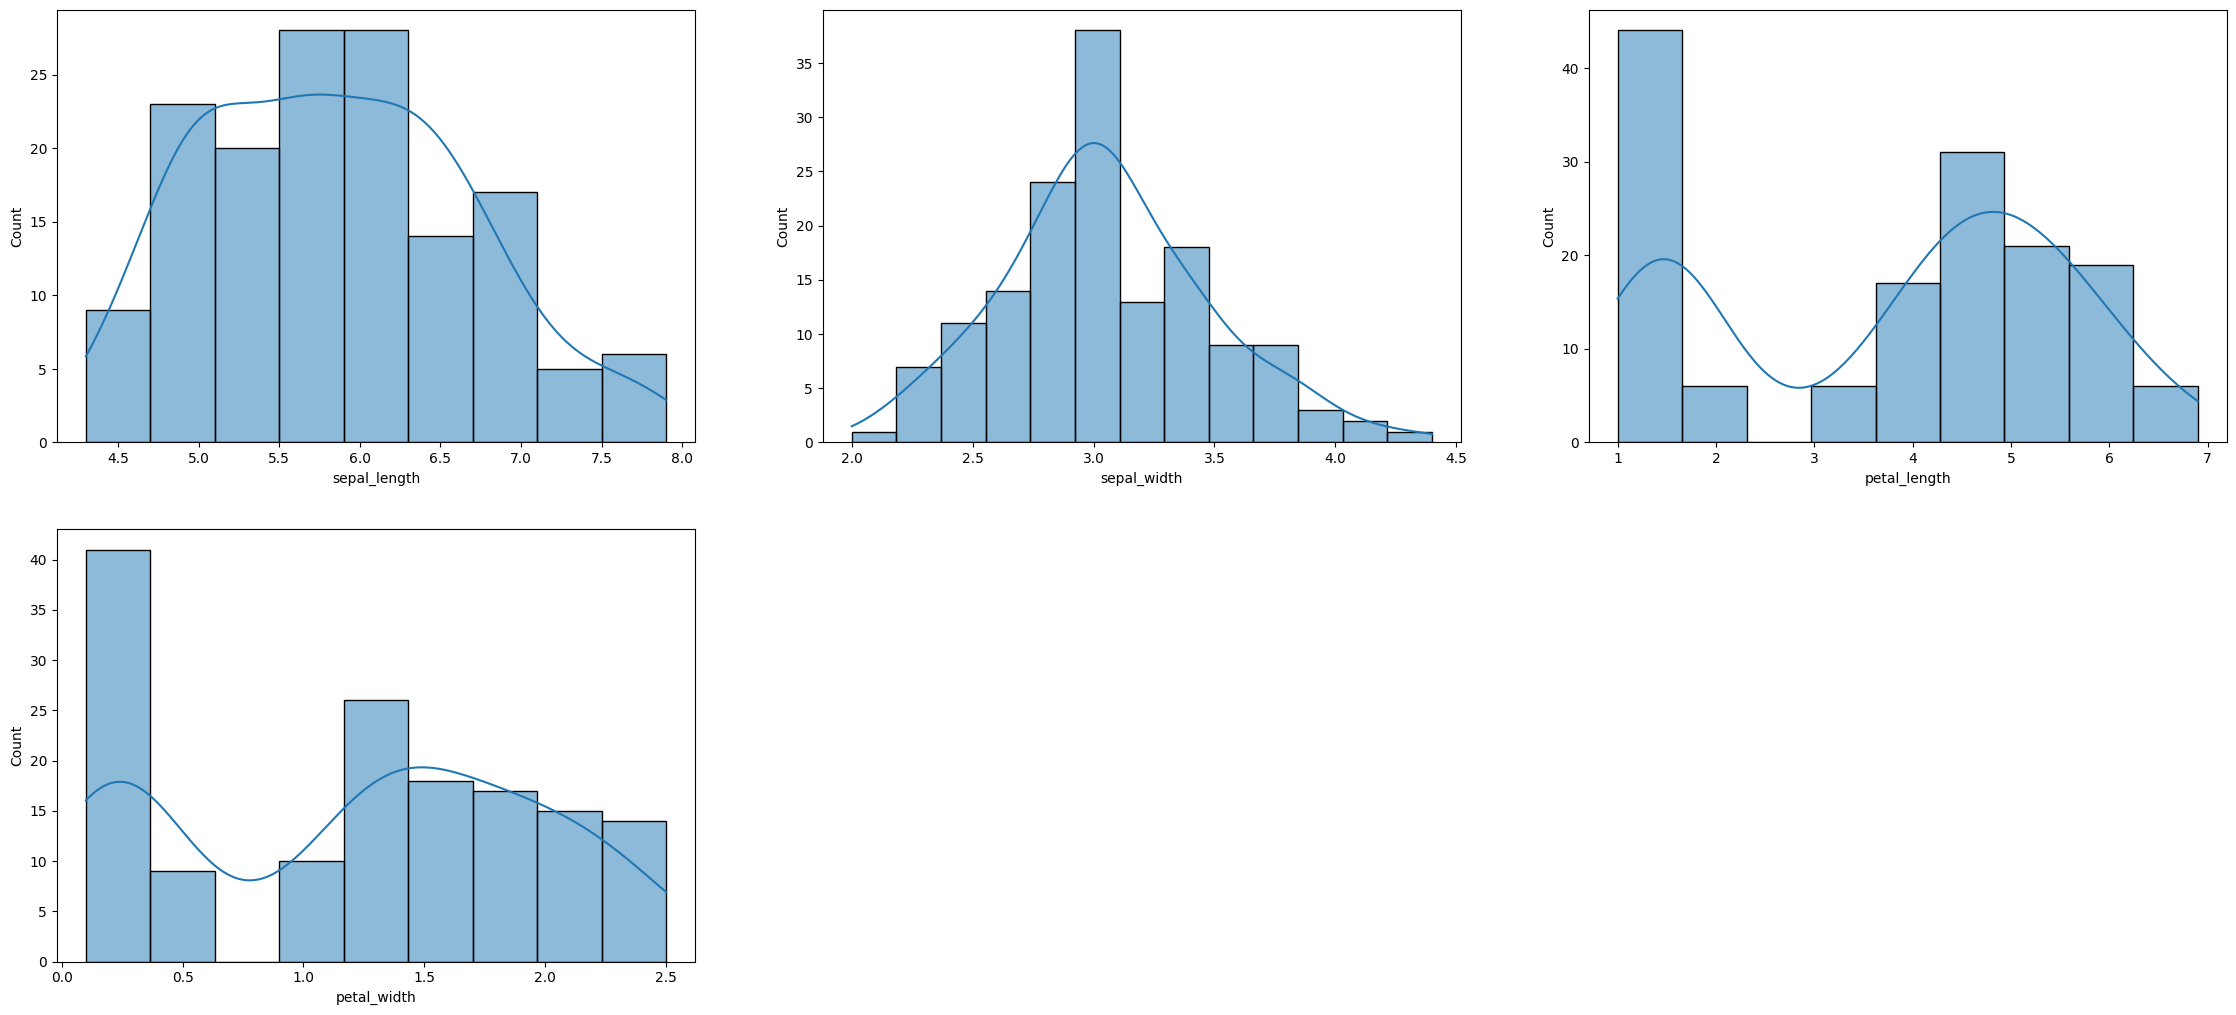

In [ ]:
#  Plot histogram  to view distribution of data
x=df.drop("Species",axis=1)
plt.figure(figsize=(28,100))
plotnumber=1
for i in x.columns:
    ax=plt.subplot(15,3,plotnumber)  # subplots to cover 3 plots at each row
    sns.histplot(df[i],kde=True)
    plt.xlabel(i) # label name of feature
    plotnumber+=1 # at which place to place plot of each feature
plt.show()

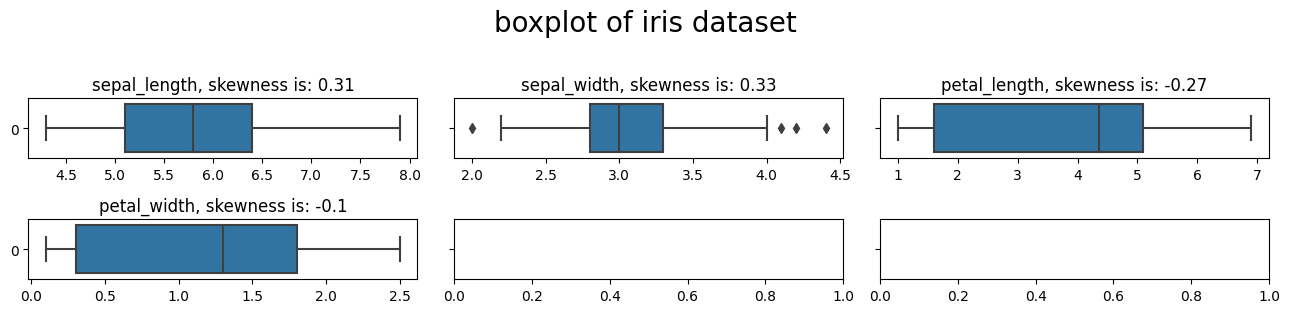

In [ ]:
# Check outliers plotting boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,3))
    fig.suptitle(suptitle,y=1.03, size=20)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

df1=df.drop("Species",axis=1)
boxplots_custom(dataset=df1, columns_list=df1.columns, rows=2, cols=3, suptitle='boxplot of iris dataset')
plt.tight_layout()

In [ ]:
#from the above boxplot we can see that sepal_width has some outliers we need to elimante the outliers

In [ ]:
# To remove outliers from 'sepal width (cm)'
q1 = df['sepal_width'].quantile(0.25)
q3 = df['sepal_width'].quantile(0.75)
iqr = q3 - q1
df = df[(df['sepal_width'] >= q1-1.5*iqr) & (df['sepal_width'] <= q3+1.5*iqr)]
df.shape # To find out the number of rows and column after outlier treatment

(146, 5)

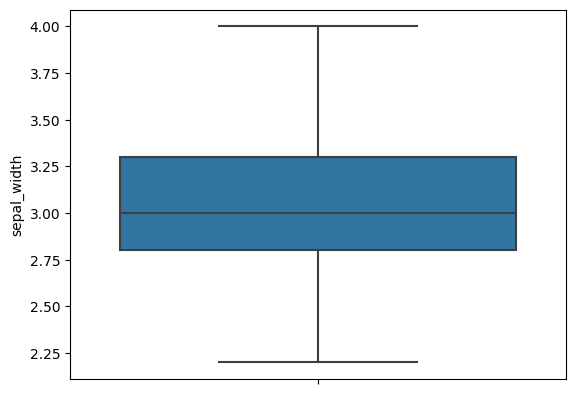

In [ ]:
 #boxplot for sepal_width after outlier treatment
sns.boxplot(y=df['sepal_width'])
plt.show()

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
df['Species']= label_encoder.fit_transform(df['Species'])
df['Species'].unique()

array([0, 1, 2])

In [ ]:
# Splitting the data into train and test sets
X = df.drop("Species",axis=1)
y = df["Species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state= 1)

##DecisionTreeClassifier

In [ ]:
# Hyperparameter Tuning of DTC
dt = DecisionTreeClassifier(random_state=1)
params = {'max_depth' : [2,3,4,5],
        'min_samples_split': [2,3,4,5],
        'min_samples_leaf': [1,2,3,4,5]}
gsearch = GridSearchCV(dt, param_grid=params, cv=3)
gsearch.fit(X,y)
gsearch.best_params_

{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [ ]:
# Passing best parameter for the Hyperparameter Tuning
dt = DecisionTreeClassifier(**gsearch.best_params_, random_state=1)
dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_prob_train = dt.predict_proba(X_train)[:,1]
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

In [ ]:
print('Confusion Matrix - Train:','\n',confusion_matrix(y_train,y_pred_train))
print('\n','Confusion Matrix - Test:','\n',confusion_matrix(y_test,y_pred))

Confusion Matrix - Train: 
 [[38  0  0]
 [ 0 37  1]
 [ 0  0 40]]

 Confusion Matrix - Test: 
 [[ 9  0  0]
 [ 0  9  2]
 [ 0  0 10]]


In [ ]:
#Classification for test after hyperparameter tuning
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.82      0.90        11
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [ ]:
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_train,y_pred_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_test,y_pred))

Accuracy of Decision Tree-Train:  0.9913793103448276
Accuracy of Decision Tree-Test:  0.9333333333333333


In [ ]:
print("accuracy",accuracy_score(y_test,y_pred))
print("f1 score",f1_score(y_test,y_pred,average="macro"))
print("recall score",recall_score(y_test,y_pred,average="macro"))
print("precision_score",precision_score(y_test,y_pred,average="macro"))
summary_list.append({"model":"DecisionTree","accuracy":accuracy_score(y_test,y_pred),
                     "f1_score":f1_score(y_test,y_pred,average="macro"),
                     "recall_score":recall_score(y_test,y_pred,average="macro"),
                     "precision_score":precision_score(y_test,y_pred,average="macro")
                     })

accuracy 0.9333333333333333
f1 score 0.9363636363636364
recall score 0.9393939393939394
precision_score 0.9444444444444445


##Bagging

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state= 22)
base_classifier = DecisionTreeClassifier()
n_estimators = 10
bagging_classifier = BaggingClassifier(estimator=base_classifier, n_estimators=n_estimators,random_state= 22)
bagging_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred_b= bagging_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_b)
print("Accuracy:", accuracy)
print("accuracy",accuracy_score(y_test,y_pred_b))
print("f1 score",f1_score(y_test,y_pred_b,average="macro"))
print("recall score",recall_score(y_test,y_pred_b,average="macro"))
print("precision_score",precision_score(y_test,y_pred_b,average="macro"))
summary_list.append({"model":"Bagging","accuracy":accuracy_score(y_test,y_pred_b),
                     "f1_score":f1_score(y_test,y_pred_b,average="macro"),
                     "recall_score":recall_score(y_test,y_pred_b,average="macro"),
                     "precision_score":precision_score(y_test,y_pred_b,average="macro")
                     })

Accuracy: 0.9666666666666667
accuracy 0.9666666666666667
f1 score 0.9696342305037957
recall score 0.9722222222222222
precision_score 0.9696969696969697


##Random Forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=40)
clf.fit(X_train,y_train)
y_pred_rf=clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred_rf))

Accuracy: 1.0


In [ ]:
#Finding Important Features
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

petal_length    0.462643
petal_width     0.425781
sepal_length    0.087505
sepal_width     0.024072
dtype: float64

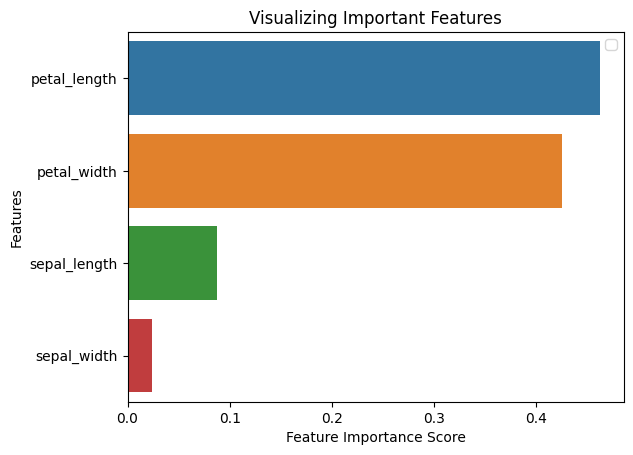

In [ ]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
#removing sepal_width because it has low importance
X_new=X[['petal_width',"petal_length","sepal_length"]] # Removed feature "sepal length"
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2,random_state=22)
clf=RandomForestClassifier(n_estimators=40)
clf.fit(X_train,y_train)
y_pred_rf=clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred_rf))
print("f1 score",f1_score(y_test,y_pred_rf,average="macro"))
print("recall score",recall_score(y_test,y_pred_rf,average="macro"))
print("precision_score",precision_score(y_test,y_pred_rf,average="macro"))
summary_list.append({"model":"RandomForest","accuracy":accuracy_score(y_test,y_pred_rf),
                     "f1_score":f1_score(y_test,y_pred_rf,average="macro"),
                     "recall_score":recall_score(y_test,y_pred_rf,average="macro"),
                     "precision_score":precision_score(y_test,y_pred_rf,average="macro")
                     })

Accuracy: 0.9666666666666667
f1 score 0.9696342305037957
recall score 0.9722222222222222
precision_score 0.9696969696969697


##XGBOOST

In [ ]:
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgbc=XGBClassifier(n_estimators=50,learning_rate=0.01,max_depth=4)
xgbc.fit(X_train, y_train)
y_pred_x= xgbc.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred_x))
print("f1 score",f1_score(y_test,y_pred_x,average="macro"))
print("recall score",recall_score(y_test,y_pred_x,average="macro"))
print("precision_score",precision_score(y_test,y_pred_x,average="macro"))
summary_list.append({"model":"XGboost","accuracy":accuracy_score(y_test,y_pred_x),
                     "f1_score":f1_score(y_test,y_pred_x,average="macro"),
                     "recall_score":recall_score(y_test,y_pred_x,average="macro"),
                     "precision_score":precision_score(y_test,y_pred_x,average="macro")
                     })

Accuracy: 0.9333333333333333
f1 score 0.9249999999999999
recall score 0.9249999999999999
precision_score 0.9249999999999999


In [ ]:
#Finding Important Features
feature_imp = pd.Series(xgbc.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

petal_width     0.550790
petal_length    0.447322
sepal_length    0.001888
sepal_width     0.000000
dtype: float32

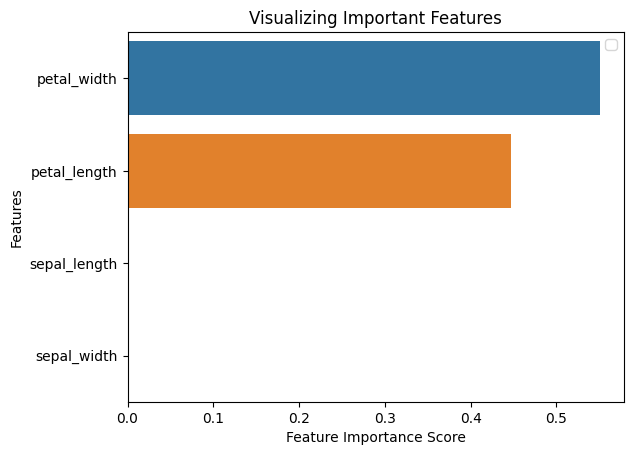

In [ ]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

##summary

In [ ]:
summary_df=pd.DataFrame(summary_list)
summary_df.set_index("model",inplace=True)
summary_df

,accuracy,f1_score,recall_score,precision_score
model,,,,
DecisionTree,0.933333,0.936364,0.939394,0.944444
Bagging,0.966667,0.969634,0.972222,0.969697
RandomForest,0.966667,0.969634,0.972222,0.969697
XGboost,0.933333,0.925000,0.925000,0.925000


In [ ]:
#from the above summary we can see that bagging and Xgboost has higher accuracy.
'''
The decision tree easy to train and can handle both numerical and categorical data. However, decision trees can easily overfit the training data,
and they can also be sensitive to irrelevant features.

Bagging is an ensemble method that combines multiple decision trees to improve their accuracy,Bagging can reduce overfitting and improve accuracy,
but it can also make the model more complex and less interpretable.

Random forests are another ensemble method that is similar to bagging, but with one key difference:
random forests use random subsets of features when training each decision tree.

XGBoost is also highly customizable, and it can be tuned to achieve very high accuracy on a wide range of classification tasks.
'''


'\nThe decision tree easy to train and can handle both numerical and categorical data. However, decision trees can easily overfit the training data, \nand they can also be sensitive to irrelevant features.\n\nBagging is an ensemble method that combines multiple decision trees to improve their accuracy,Bagging can reduce overfitting and improve accuracy, \nbut it can also make the model more complex and less interpretable.\n\nRandom forests are another ensemble method that is similar to bagging, but with one key difference:\nrandom forests use random subsets of features when training each decision tree.\n\nXGBoost is also highly customizable, and it can be tuned to achieve very high accuracy on a wide range of classification tasks.\n'